In [1]:
from IPython.display import Markdown, display
display(Markdown(open("./SM_header.md", "r").read()))

Copyright © 2025 Université Paris Cité

Author: [Guillaume Rousseau](https://www.linkedin.com/in/grouss/), Laboratoire Matières et Systèmes Complexes, UMR 7057, CNRS and Université Paris Cité, CNRS, UMR7057, 10 rue Alice Domon et Léonie Duquet, F-75013, Paris cedex 13, France (email: guillaume.rousseau@u-paris.fr)

This archive contains the supplemental materials and replication package associated with the preprint, "*Growth Regime Shifts in Empirical Networks: Evidence and Challenges from the Software Heritage and APS Citation Case Studies*", available on [arXiv](https://arxiv.org/abs/2501.10145) and [ssrn](http://ssrn.com/abstract=5191689).

**The latest version of the preprint (timestamped arXiv:2501.10145v4) is downloadable here https://arxiv.org/pdf/2501.10145**

The current version of the Python scripts and associated resources is available on the [author's GitHub page](https://github.com/grouss/growing-network-study).

This work is currently licensed under the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0).

To give appropriate credit and cite this work ([BibTeX entry](./rousseau2025temporal)):
Rousseau, G. (2025). *Growth Regime Shifts in Empirical Networks: Evidence and Challenges from the Software Heritage and APS Citation Case Studies* [Preprint]. arXiv:2501.10145. https://arxiv.org/abs/2501.10145; also available on SSRN: http://ssrn.com/abstract=5191689

 
# A) Replication Packages

[Open the Replication Package notebook related to the datasets.](./Replication_Package_Datasets.ipynb)

[Open the Replication Package notebook related to the figures.](./Replication_Package_Figures.ipynb)

# B) QuickStart Guide

[Open the QuickStart Guide notebook](./SM00_QuickStart.ipynb)

# C) Table of Contents

- 1. [Function Definitions](./SM01_Functions.ipynb)
- 2. [Dataset Import](./SM02_DatasetImport.ipynb)
- 3. [Building the Transposed Graph](./SM03_BuildingTransposedGraph.ipynb)
- 4. [Temporal Information Quality and Summary Statistics](./SM04_TemporalInformationMainStats.ipynb)
- 5. [Growth Relationship Between Nodes and Edges](./SM05_GrowingRules.ipynb)
- 6. [Topological Partitioning($RV$ Nodes)](./SM06_TopologicalPartitioning.ipynb)
- 7. [In-Degree and Out-Degree Distributions Over Time](./SM07_DegreeDistributionOverTime.ipynb)
- 8. [Distribution Tail Analysis](./SM08_DistributionTailAnalysis.ipynb)
- 9. [Temporal Partitioning](./SM09_TemporalPartitioning.ipynb)
- 10. [Derived $O-(RV/RL)-O$ Graph Construction](./SM10_DerivedGrowingNetwork.ipynb)
- 11. [Building the $TSL$ Partitioning](./SM11_TSLPartitioning.ipynb)
- 12. [Price / Directed Barabási–Albert Model Use Case](./SM12_BarabasiAlbertUseCase.ipynb)
- 13. [APS citation network](./SM13_APSCitationNetwork.ipynb)
- 14. [Generic Report Template](./SM14_GenericReport.ipynb)


**NB :** As of 2025/09/15, the QuickStart guide, the replication packages, and SM01 to SM14 are available. The Python scripts are also provided under `local_utils` directory, but they are not in their final form and should be considered an alpha release. 

The main graph datasets used in the study are available in a distinct Zenodo Deposit 10.5281/zenodo.15260640 ($\sim50$ Go), including the main dataset $O/RV/RL-O/RV/RL$ (2+ billions of nodes, $\sim4$ billions of edges), and two derived $O-(RV/RL)-O$ graphs ($\sim150$ millions nodes and edges).

The APS Citation Dataset (2022 export) has been included in the study.

More release notes are available in the [dedicated notebook](./SM_ReleaseNote.ipynb).

In [2]:
%load_ext autoreload
%autoreload 2

import importlib,sys,local_utils
from local_utils import *

print("___ Import data from graphpath=",config.graphpath)
print("___ Export data to exportpath=",config.exportpath)   
DisplayCopyrightInfo()


___ Import data from graphpath= ./ImportData/
___ Export data to exportpath= ./ExportData/
--------------------------------------------------------------------------------
Copyright 2025 Université Paris Cité, France 
Author: Guillaume Rousseau, MSC Lab, Physics Department, Paris, France 

(https://www.linkedin.com/in/grouss/)

This archive contains the supplemental materials and replication package associated with the preprint available on :
- arXiv (https://arxiv.org/abs/2501.10145)
- SSRN  (http://ssrn.com/abstract=5191689

Current version of python scripts and associated ressources are available on author's github page
(https://github.com/grouss/growing-network-study)

This work is currently licensed under CC BY-NC-SA 4.0
(https://creativecommons.org/licenses/by-nc-sa/4.0)
--------------------------------------------------------------------------------



# 12 Price / Directed Barabási-Albert model Use Case

## a) The Barabási-Albert model

We first construct a graph following the rules of the Barabási-Albert model.

The principle is that, incrementally, we add a single node with $m$ edges pointing to pre-existing nodes with a probability based on the preferential attachment rule. This rule gives the probability that the new node connects to a node with index $i$, defined as:
$$
p_i = \frac{k_i}{\sum_l k_l}
$$

The edges in the Barabási-Albert model are undirected. Here, it should be understood that in the denominator, the sum includes both incoming and outgoing degrees (see the following discussion for more details).

This directed Barabási-Albert-like model is indeed the Price model which was first introduced by Derek J. de Solla Price:
- de Solla Price, D. J. (1965). “Networks of Scientific Papers.” Science, 149(3683), 510–515. https://doi.org/10.1126/science.149.3683.510
- de Solla Price, D. J. (1976). “A General Theory of Bibliometric and Other Cumulative Advantage Processes.” Journal of the American Society for Information Science, 27(5), 292–306. https://doi.org/10.1002/asi.4630270505

The CSR dataset format we have used here is directed by default. It is more generic to consider the undirected graph as a particular case of a directed graph.

In practice, we explicitly prohibit the possibility of the same node being connected to another node more than once. Note that this restriction is not trivial in practice, as for $m \ne 1$, the random draws are no longer independent. The discussion about the consequences (or lack thereof) is beyond the scope of this study, except for the fact that this is precisely the type of details that  affects the identification of relevant minimal models.

As an initial condition, we use a fully connected graph of $m+1$ nodes.

To maintain the analogy with the graph studied here, we introduce a boolean parameter that allows each node to have a self-loop (an edge pointing to itself). However, this self-loop degree is excluded from the preferential attachment rule.



In [13]:
Debug=True
DisplayStat=True
Rebuild=True
Fsave=Rebuild
version="20250524"

In [7]:
n=int(1e7)
m=2
SelfLoop=False
nodes,edges,Nnodes,Nedges,SelfLoop=BarabasiAlbertGraph(n,m,SelfLoop=SelfLoop,Verbose=True,seed=42)
print("nodes",nodes,nodes.shape)
print("edges",edges,edges.shape)
print(Nnodes,Nedges)

Elapse 12.388107061386108
nodes [       0        2        4 ... 19999996 19999998 20000000] (10000001,)
edges [      1       2       0 ... 6441183 9760937 8500957] (20000000,)
10000000 20000000


In [9]:

# check that edge point toward nodes with index smaller than the source node index
if Debug:
    # not optimal
    if SelfLoop:
        for i in range(min(n,int(1e5))):
            edgesList=edges[nodes[i]:nodes[i+1]]
            if np.sum(edgesList==i)!=1 or np.sum(edgesList>i)!=0 :
                if i<=m:
                    print("WARNING",i,edgesList)
                else:
                    print("ERROR",i,edgesList)
    else:
        for i in range(min(n,int(1e5))):
            edgesList=edges[nodes[i]:nodes[i+1]]
            if np.sum(edgesList>=i)!=0:
                if i<=m:
                    print("WARNING",i,edgesList)
                else:
                    print("ERROR",i,edgesList)
    

WARNING 0 [1 2]
WARNING 1 [0 2]


## b) In-degree distribution (theory)

[5921 7545 6025 ...    0    0    0]
[5002430 1997627 1000452 ...       0       0       1]


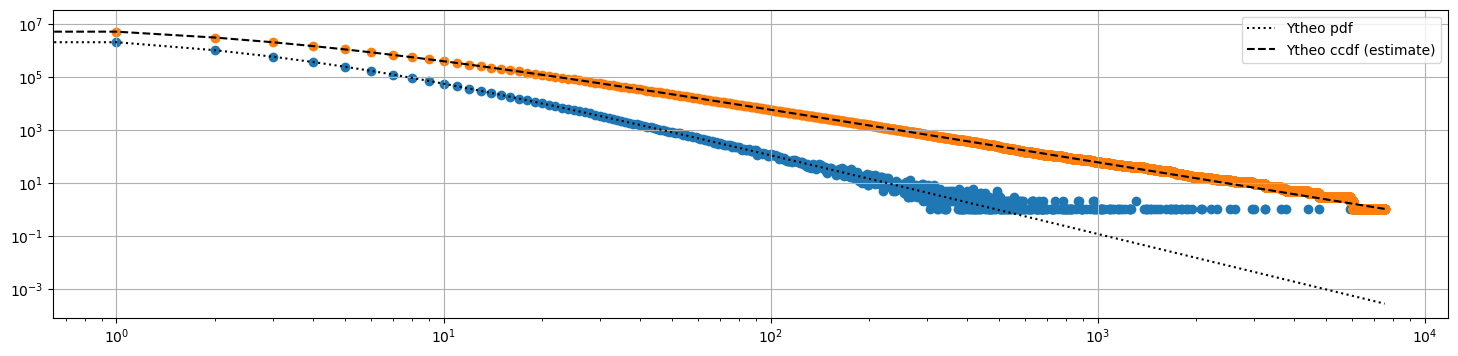

In [10]:
if DisplayStat:
    def Function(k,m,SelfLoop,n):
        # see Reka et al, 2002
        # here k is the indegree, and therefore 
        # the degree which appears in the preferential attachment 
        # (excluding SelfLoop if the exists)
        # rule is k+m
        if SelfLoop:
            shift=1
        else:
            shift=0
        try:
            mink=min(k-shift) # ok if array
        except:
            mink=k-shift
        if mink>=0 and m>=1:
            return 2*n*m*(m+1)/(k+m-shift)/(k+1+m-shift)/(k+2+m-shift)
        else:
            print("Invalid value for k>=0 or m>=1. (k,m,shift):",(k,m,shift))
            return -1

    stat=np.bincount(edges,minlength=n)
    print(stat)
    hist=np.bincount(stat)
    print(hist)

    plt.figure(figsize=(18,4))
    plt.scatter(np.arange(len(hist)),hist)
    ccdf=np.cumsum(hist[::-1])[::-1]
    plt.scatter(np.arange(len(hist)),ccdf)

    if SelfLoop:
        x=np.arange(1,len(hist)*10) # indegree value
    else:
        x=np.arange(0,len(hist)*10)

    ytheo=Function(x,m,SelfLoop,n)
    ytheoccdf=np.cumsum(ytheo[::-1])[::-1] # estimate of the ccdf

    mask=x<=len(hist)
    plt.plot(x[mask],ytheo[mask],":k",label="Ytheo pdf")
    plt.plot(x[mask],ytheoccdf[mask],"--k",label="Ytheo ccdf (estimate)")

    plt.yscale("log")
    plt.xscale("log")
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
if DisplayStat:
    d=SetParamsBA_d(Nnodes)
    statsoutput=DisplayTypeStats(nodes,edges,d,Debug=True)    


GetNodesTypesArray [Elapse time : 0.0 (s)]
___ O     :      10,000,000 (100.0%)
____________________________________
___ Total :      10,000,000 (100.0%)
Debug []

GetEdgesTypesArray [Elapse time : 0.0 (s)]
___ O>O   :      20,000,000 (100.0%)
____________________________________
___ Total :      20,000,000 (100.0%)
Debug []



## c) Stats over "time"

Set up timestamp between 1970 and 2021 assuming exponential increase of the number of nodes only to ease comparison with the previous dataset (node "creation" ordering is preserved)


In [12]:

nodesad=SetParamsBA_nodesad(Nnodes)


In [14]:

if Rebuild:
    # nodes creation over time (per type per month)
    stat={}
    ti=time.time()
    stat=BuildNodesTimeStampHisto(nodes,edges,nodesad,d,stat=stat)
    tf=time.time()
    print("BuildNodesTimeStampHisto Elapse ",np.round(tf-ti),"(s)")
    print(stat.keys())
    # BuildNodesTimeStampHisto Elapse  144.0
    # edges creation over time (per type per month)
    ti=time.time()
    stat=BuildEdgesTimeStampHisto(nodes,edges,nodesad,d,stat=stat,Verbose=True)
    tf=time.time()
    print("BuildEdgesTimeStampHisto Elapse ",np.round(tf-ti),"(s)")
    print(stat.keys())
    filename=exportpath+"stat_nodes_edges_O-O_BA_1970_2030_"+version+".pkl"
    if Fsave:
        pickle.dump(stat,open(filename,"wb"))


BuildNodesTimeStampHisto Elapse  0.0 (s)
dict_keys(['O'])
edgesTSM 1/2  0.0 (s)
edgesTSM 2/2  0.0 (s)
edgestype 1/1  0.0 (s)
TSM2stat 1/1  0.0 (s)
BuildEdgesTimeStampHisto Elapse  0.0 (s)
dict_keys(['O', 'O>O'])


./ExportData/stat_nodes_edges_O-O_BA_1970_2030_20250524.pkl


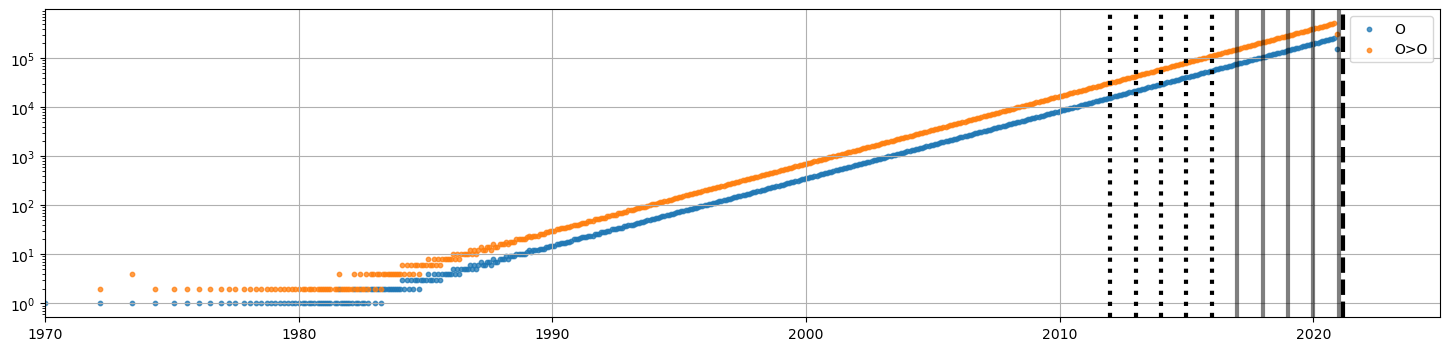

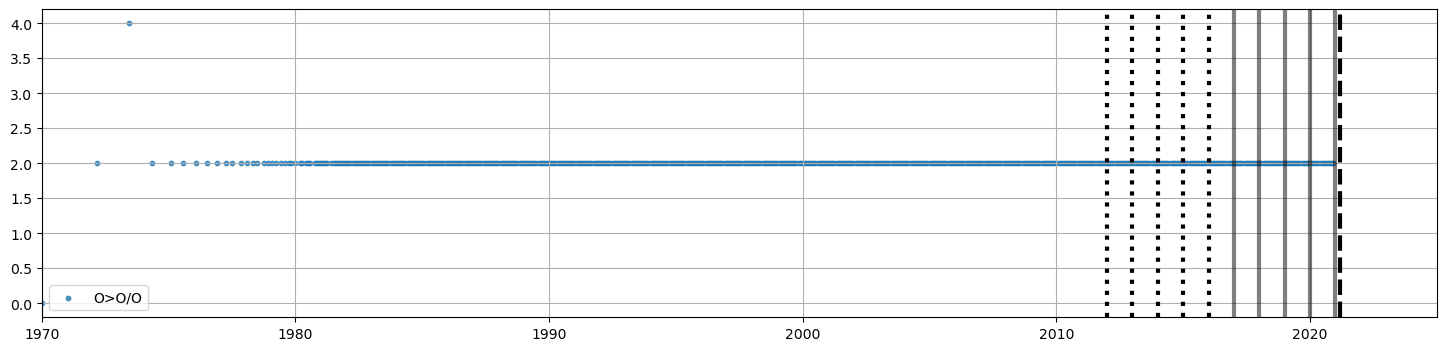

In [15]:
if DisplayStat:
    filename=exportpath+"stat_nodes_edges_O-O_BA_1970_2030_"+version+".pkl"
    print(filename)
    stat=pickle.load(open(filename,"rb"))
    # displaying all curves
    x=np.arange(1634)/12+1970
    def VerticalLinesLocal():
        lw=3;alpha=0.5
        #plt.xlim(1990,2030)
        for year in [2017,2018,2019,2020,2021]:
            plt.axvline(x=year,color='k',alpha=alpha,lw=lw)
        plt.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2012,2013,2014,2015,2016]:
            plt.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)
        plt.grid()
        plt.legend()

    plt.figure(figsize=(18,4))
    for key,value in stat.items():
        if np.sum(value[1:-1])!=0:
            plt.scatter(x,value,s=10,label=key,alpha=0.75)
    plt.yscale('log')
    plt.xlim(1970,2025)
    VerticalLinesLocal()
    plt.show()

    plt.figure(figsize=(18,4))
    for key,value in stat.items():
        if np.sum(value[1:-1])!=0 and ">" in key:
            length=(len(key)-1)//2
            plt.scatter(x,value/stat[key[-length:]],s=10,label=key+"/"+key[-length:],alpha=0.75)
    VerticalLinesLocal()
    plt.xlim(1970,2025)
    plt.show()

Edge Source/Target TS Building  0.22 (s)
Mask Building  0.02 (s)
20,000,000 valid edges over a total of 20,000,000 i.e. 100.0 % of valid edges
Unvalid edges are mainly orgin nodes without release or revision nodes after partitioning for which nodesad=2^32-1
Building DeltaTS  0.06 (s)
Applying Mask  0.23 (s)
Building edge type array and applying mask 0.04 (s)
Start for edge type : O>O


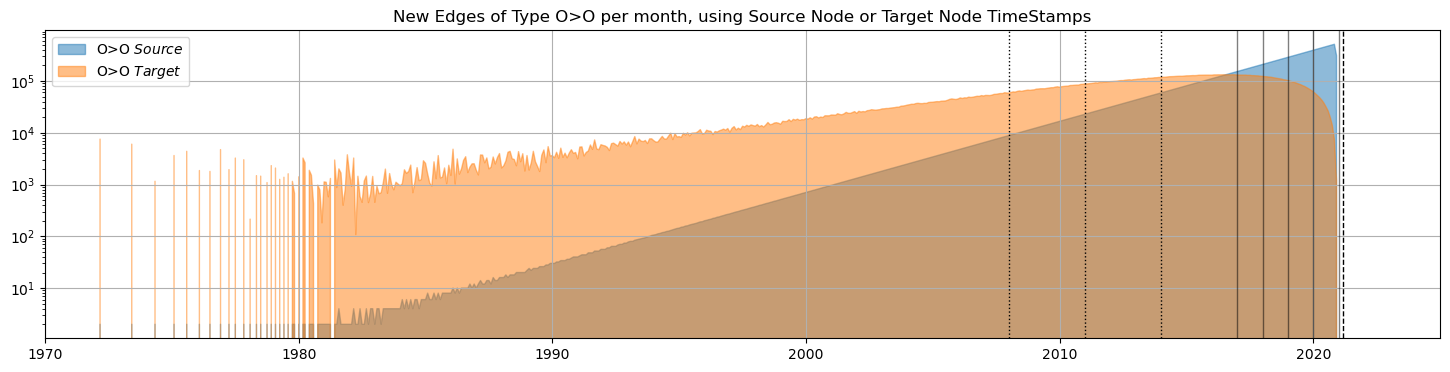

!! Excluding SelfLoops
             TS <= -10 Years               0 i.e   0.00 %
-10 Years <  TS <= - 1 Year                3 i.e   0.00 %
- 1 Year  <  TS <= - 1 Month               0 i.e   0.00 %
- 1 Month <  TS <= - 1 Week                0 i.e   0.00 %
- 1 Week  <  TS <= - 1 Day                 0 i.e   0.00 %
- 1 Day   <  TS <= - 1 Hour                0 i.e   0.00 %
- 1 Hour  <  TS <= - 1 Mn                  0 i.e   0.00 %
- 1 Mn    <  TS <= - 1 S                   0 i.e   0.00 %
................................................................................
O>O     Total TS <  0 S (negative)               3 i.e   0.00 %
................................................................................
O>O     ***** TS == 0 S (null)                   0 i.e   0.00 %
................................................................................
O>O     Total TS >  0 S (positive)      19,999,997 i.e 100.00 %
..............................................................................

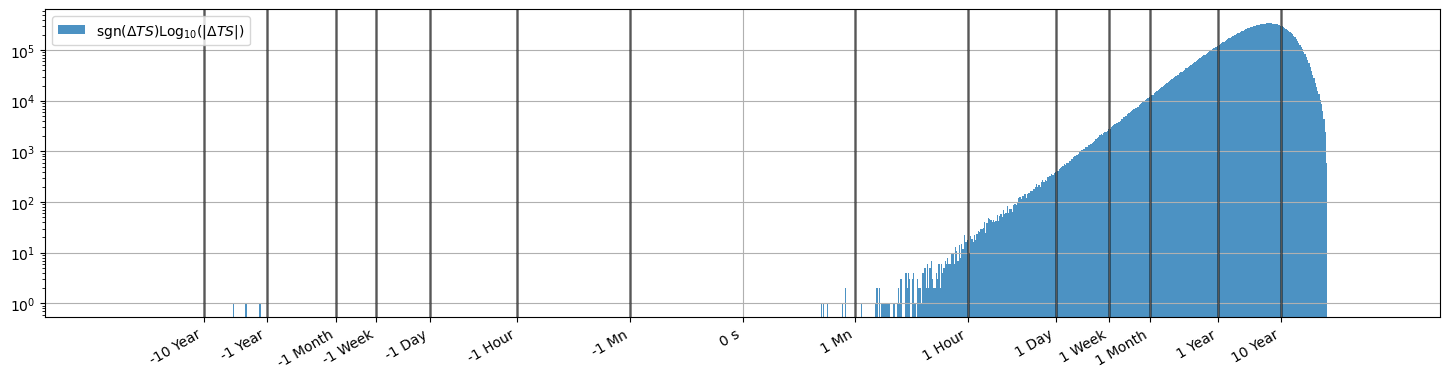

End for edge type : O>O


In [16]:
if DisplayStat:
    ExcludingSelfLoop=True
    ti=time.time()
    sourcearrayTS=GetSourceEdgeTimeStamp(nodes,edges,nodesad,d)
    targetarrayTS=GetTargetEdgeTimeStamp(nodes,edges,nodesad,d)
    tf=time.time()
    print("Edge Source/Target TS Building ",np.round(tf-ti,2),"(s)")
    # we exclude edges where timestamp==0 or timestamp==2**32-1
    ti=time.time()
    mask=np.logical_and(np.logical_and(sourcearrayTS!=0,sourcearrayTS!=2**32-1),np.logical_and(targetarrayTS!=0,targetarrayTS!=2**32-1))
    # one excludes selfloop
    if SelfLoop and ExcludingSelfLoop:
        print("!! Excluding SelfLoops")
        sourceEdges=GetSourceEdge(nodes)
        mask=np.logical_and(mask,sourceEdges!=edges)
    tf=time.time()
    print("Mask Building ",np.round(tf-ti,2),"(s)")
    valid_edges=np.sum(mask)
    print(f'{valid_edges:,} valid edges over a total of {edges.shape[0]:,} i.e. {np.round(valid_edges/edges.shape[0]*100,2)} % of valid edges')
    print('Unvalid edges are mainly orgin nodes without release or revision nodes after partitioning for which nodesad=2^32-1')
    # ! Timestamp are uint32 (must convert to int before diff)
    # deltaTS still in second (negative or positive)
    ti=time.time()
    sourcearrayTS=sourcearrayTS[mask]
    targetarrayTS=targetarrayTS[mask]
    deltaTS=sourcearrayTS.astype('int')-targetarrayTS.astype('int')
    tf=time.time()
    print("Building DeltaTS ",np.round(tf-ti,2),"(s)")
    # convert s since EPOCH to Months since EPOCH
    ti=time.time()
    sourcearrayTS=timestampsarray2yearmonth(sourcearrayTS)
    targetarrayTS=timestampsarray2yearmonth(targetarrayTS)
    tf=time.time()
    print("Applying Mask ",np.round(tf-ti,2),"(s)")
    ti=time.time()
    arraytype,encoding=GetEdgesTypesArray(nodes,edges,d)
    arraytype=arraytype[mask]
    tf=time.time()
    print("Building edge type array and applying mask",np.round(tf-ti,2),"(s)")

    for i,Etype in enumerate(encoding):
        mask_type=arraytype==i

        if np.sum(mask_type)!=0:
            print("Start for edge type :",Etype)
            PlotTSoverTimeEdges(sourcearrayTS[mask_type],targetarrayTS[mask_type],Etype)
            if ExcludingSelfLoop :
                print("!! Excluding SelfLoops")
            DisplayTSstat(deltaTS[mask_type],Etype)
            PlotTSHisto(deltaTS[mask_type],Etype)
     

**Comment**: 

By construction only edges defined in the initial condition can have $\Delta TS<0$

The shape of this histogram is very charateristic of the growing regime and can be compared to the one obtained for real-world network.

## d) In-degree distribution over "time"

In [18]:
if Rebuild:
    # not optimal, but just a copy paste of cells from other notebooks
    ti=time.time()
    Edgestype,Edgesencoding=GetEdgesTypesArray(nodes,edges,d)
    Nodestype,Nodesencoding=GetNodesTypesArray(nodes,edges,d)
    tf=time.time()
    print("Node and Edge Type Building ",np.round(tf-ti,2),"(s)")
    ti=time.time()
    sourceedges=GetSourceEdge(nodes,Nedges)
    sourceType=Nodestype[sourceedges]
    sourceTSY=timestampsarray2yearmonth(GetSourceEdgeTimeStamp(nodes,edges,nodesad,d))//12 # up to the end of the year
    tf=time.time()
    print("Source Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    ti=time.time()
    targetType=Nodestype[edges]
    targetTSY=timestampsarray2yearmonth(GetTargetEdgeTimeStamp(nodes,edges,nodesad,d))//12 # up to the end of the year
    tf=time.time()
    print("Target Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    dout={}
    din={}

    # we take into account "true time"
    TSY=np.maximum(sourceTSY,targetTSY)
    GetAllTypesDegreeStats(sourceedges,edges,TSY,dout,din,Nnodes)    
    GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,Nnodes,PerFlag="EDGE")   
    GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,Nnodes,PerFlag="SOURCE")  
    GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,Nnodes,PerFlag="TARGET")   
    Fsave=True
    if Fsave:
        filename=exportpath+"degreeInOutHisto_TT_O-O_BA_year_1980_2025_"+version+".pkl"
        pickle.dump((dout,din),open(filename,"wb"))

Node and Edge Type Building  0.04 (s)
Source Type and TimesTamp Building elapse :  0.33 (s)
Target Type and TimesTamp Building elapse :  0.25 (s)
Start All types
1980 1984 1988 1992 1996 2000 2004 2008 2012 2016 2020 2024 
All types elapse :  5.37 (s)
Start Per EDGE types 
Start type O>O / 20,000,000 edges | 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016 2020 2024 
Per edges types elapse :  4.91 (s)
Start Per SOURCE types 
Start type O> / 20,000,000 edges | 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016 2020 2024 
Per edges types elapse :  5.34 (s)
Start Per TARGET types 
Start type >O / 20,000,000 edges | 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016 2020 2024 
Per edges types elapse :  5.32 (s)


dout.keys() dict_keys(['All types', 'O>O', 'O>', '>O'])
din.keys()  dict_keys(['All types', 'O>O', 'O>', '>O'])
--------------------------------------------------------------------------------


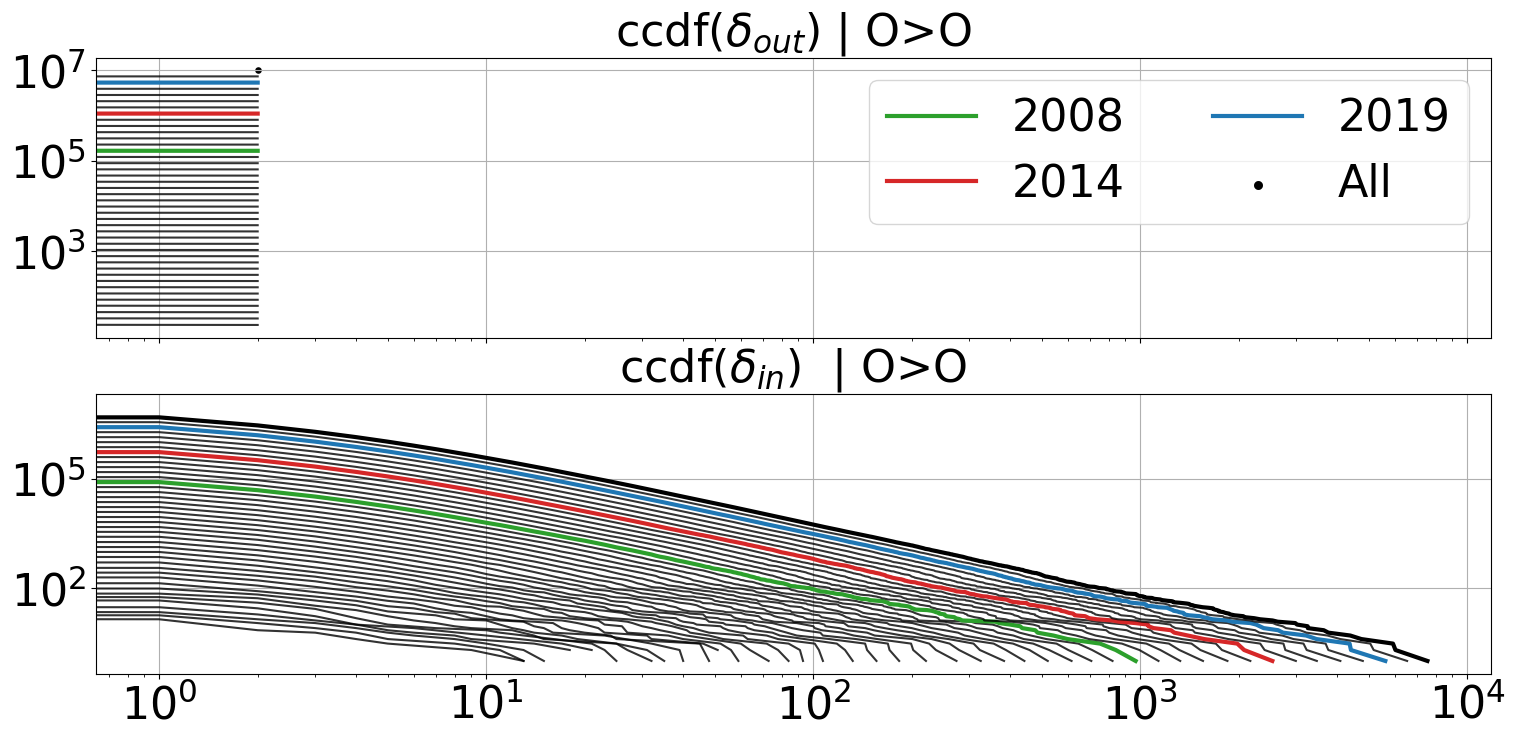

In [19]:
if DisplayStat:
    filename=exportpath+"degreeInOutHisto_TT_O-O_BA_year_1980_2025_"+version+".pkl"
    dout,din=pickle.load(open(filename,"rb"))
    print("dout.keys()",dout.keys())
    print("din.keys() ",din.keys())
    nfig=2
    fontsize=FontSize[nfig]

    # ccdf or df
    if True:
        field,key=('ccdf',"ccdf")
    else:
        field,key=('y',"df")


    YearList=[2008,2014,2019,3000]
    ColorList=["tab:green","tab:red","tab:blue","k"]
    #for s in dout.keys():
    for s in ["O>O"]:
        # ONLY FOCUS on "O>O" (others are empty)
        print("-"*80)
        fig, axs = plt.subplots(nfig,figsize=(18,4*nfig),sharex=True)   
        for i in [0,1]:
            axs[i].grid()
            axs[i].set_yscale("log")
            axs[i].set_xscale("log")
            axs[i].tick_params(axis='both',which='major',labelsize=FontSize[nfig])

        for year in dout[s].keys():
            if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                label=str(year)
                if year==3000:
                    label="All"
                if len(dout[s][year]["x"])!=1:
                    axs[0].plot(dout[s][year]["x"],dout[s][year][key],markersize=0.5,c=c,lw=3,label=label)
                else:
                    axs[0].scatter(dout[s][year]["x"],dout[s][year][key],s=3,c=c,lw=3,label=label)

                if len(din[s][year]["x"])!=1:
                    axs[1].plot(din[s][year]["x"],din[s][year][key],markersize=0.5,c=c,lw=3,label=label)
                else:
                    axs[1].scatter(din[s][year]["x"],din[s][year][key],s=3,c=c,lw=3,label=label)


            else:
                if len(dout[s][year]["x"])!=1:
                    axs[0].plot(dout[s][year]["x"],dout[s][year][key],markersize=0.5,c="k",alpha=0.8)
                else:
                    axs[0].scatter(dout[s][year]["x"],dout[s][year][key],s=0.5,c="k",alpha=0.8)
                if len(din[s][year]["x"])!=1:
                    axs[1].plot(din[s][year]["x"],din[s][year][key],markersize=0.5,c="k",alpha=0.8)
                else:
                    axs[1].scatter(din[s][year]["x"],din[s][year][key],s=0.5,c="k",alpha=0.8)

        axs[1].set_title(field+r'$(\delta_{in})$  | '+s,fontsize=fontsize)
        axs[0].set_title(field+r'$(\delta_{out})$ | '+s,fontsize=fontsize)
        axs[0].legend(loc='upper right',fontsize=fontsize,ncol=2,markerscale=2)
        plt.show()

**Comment**:  
One can observe here how the in-degree distribution becomes more regular over time for fixed in-degree value, and how the initial conditions—namely, the degree distribution of the seed graph used to initialize the BA model—are still visible in the tail of the distribution.


## e) Scaling factor over "time"

In [20]:
if Rebuild:
    # not optimal but copy paste of previous cell
    Edgestype,Edgesencoding=GetEdgesTypesArray(nodes,edges,d)
    Nodestype,Nodesencoding=GetNodesTypesArray(nodes,edges,d)
    
    ti=time.time()
    sourceedges=GetSourceEdge(nodes,Nedges)
    sourceType=Nodestype[sourceedges]
    sourceTSM=timestampsarray2yearmonth(GetSourceEdgeTimeStamp(nodes,edges,nodesad,d))
    tf=time.time()
    print("Source Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    ti=time.time()
    targetType=Nodestype[edges]
    targetTSM=timestampsarray2yearmonth(GetTargetEdgeTimeStamp(nodes,edges,nodesad,d))
    tf=time.time()
    print("Target Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    
    #sourceTSM[:nodes[d["OindexMax"]+1]]=targetTSM[:nodes[d["OindexMax"]+1]]
    
    TSM=np.maximum(sourceTSM,targetTSM)
    del sourceTSM,targetTSM
    dout={}
    din={}
    # permute edges to swith to TT
    # can update timestamp and/or source/target
    # here only TT (no perutation of source and target)
    #GetAllTypesDegreeStats(sourceedges,edges,TSY,dout,din)    
    GetPerTypesDegreeStats(sourceedges,edges,None,Edgestype,Edgesencoding,dout,din,Nnodes,PerFlag="EDGE",FlagMonth=True,TSM=TSM)   
    #GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,PerFlag="TARGET")   
    #GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,PerFlag="SOURCE")  
    if Fsave:
        filename=exportpath+"degreeInOutHisto_TT_O-O_BA_Month_1980_2025_"+version+".pkl"
        print("Save :",filename)
        pickle.dump((dout,din),open(filename,"wb"))


Source Type and TimesTamp Building elapse :  0.29 (s)
Target Type and TimesTamp Building elapse :  0.17 (s)
Start Per EDGE types 
Start type O>O / 20,000,000 edges | 1980 0 1984 6 1989 0 1993 6 1998 0 2002 6 2007 0 2011 6 2016 0 2020 6 2025 0 
Per edges types elapse :  62.06 (s)
Save : ./ExportData/degreeInOutHisto_TT_O-O_BA_Month_1980_2025_20250524.pkl


In [22]:
if Rebuild or DisplayStat: 
    
    WKS="weightedKS"
    XCmin=6
    print("weightedKS",WKS,"XCmin>=",XCmin,"Version",version)
    filename=exportpath+"degreeInOutHisto_TT_O-O_BA_Month_1980_2025_"+version+".pkl"
    dout,din=pickle.load(open(filename,"rb"))
    print(dout.keys(),din.keys())
    xdate=[]
    x_min=[]
    e_x_min=[]
    D_max=[]
    for year in range(1990,2022,1):
        for month in range(0,12):
            try:
                x=din["O>O"][year*12+month]["x"]
                y=din["O>O"][year*12+month]["y"]
                yc=din["O>O"][year*12+month]["ccdf"]
                yfit,xfit,imin,x_min_shift,e_x_min_shift,D_max_shift=Get_yfit_yc_y_x(x,y,yc,Fall=True,WKS=WKS,XCmin=XCmin)
                xdate.append(year+(month-1)/12)
                x_min.append(x_min_shift[imin])
                e_x_min.append(e_x_min_shift[imin])
                D_max.append(D_max_shift[imin])
            except:
                #print("missing",year,month)
                pass
        if len(x_min)!=0:
            print(year,x_min[-1],end=" ")
        else:
            print(year,x_min,end=" ")


weightedKS weightedKS XCmin>= 6 Version 20250524
dict_keys(['O>O']) dict_keys(['O>O'])
1990 6 1991 6 1992 6 1993 6 1994 6 1995 8 1996 8 1997 8 1998 8 1999 6 2000 8 2001 10 2002 12 2003 13 2004 14 2005 16 2006 18 2007 20 2008 23 2009 26 2010 14 2011 16 2012 43 2013 28 2014 32 2015 35 2016 26 2017 31 2018 36 2019 35 2020 46 2021 47 

weightedKS weightedKS XCmin>= 6


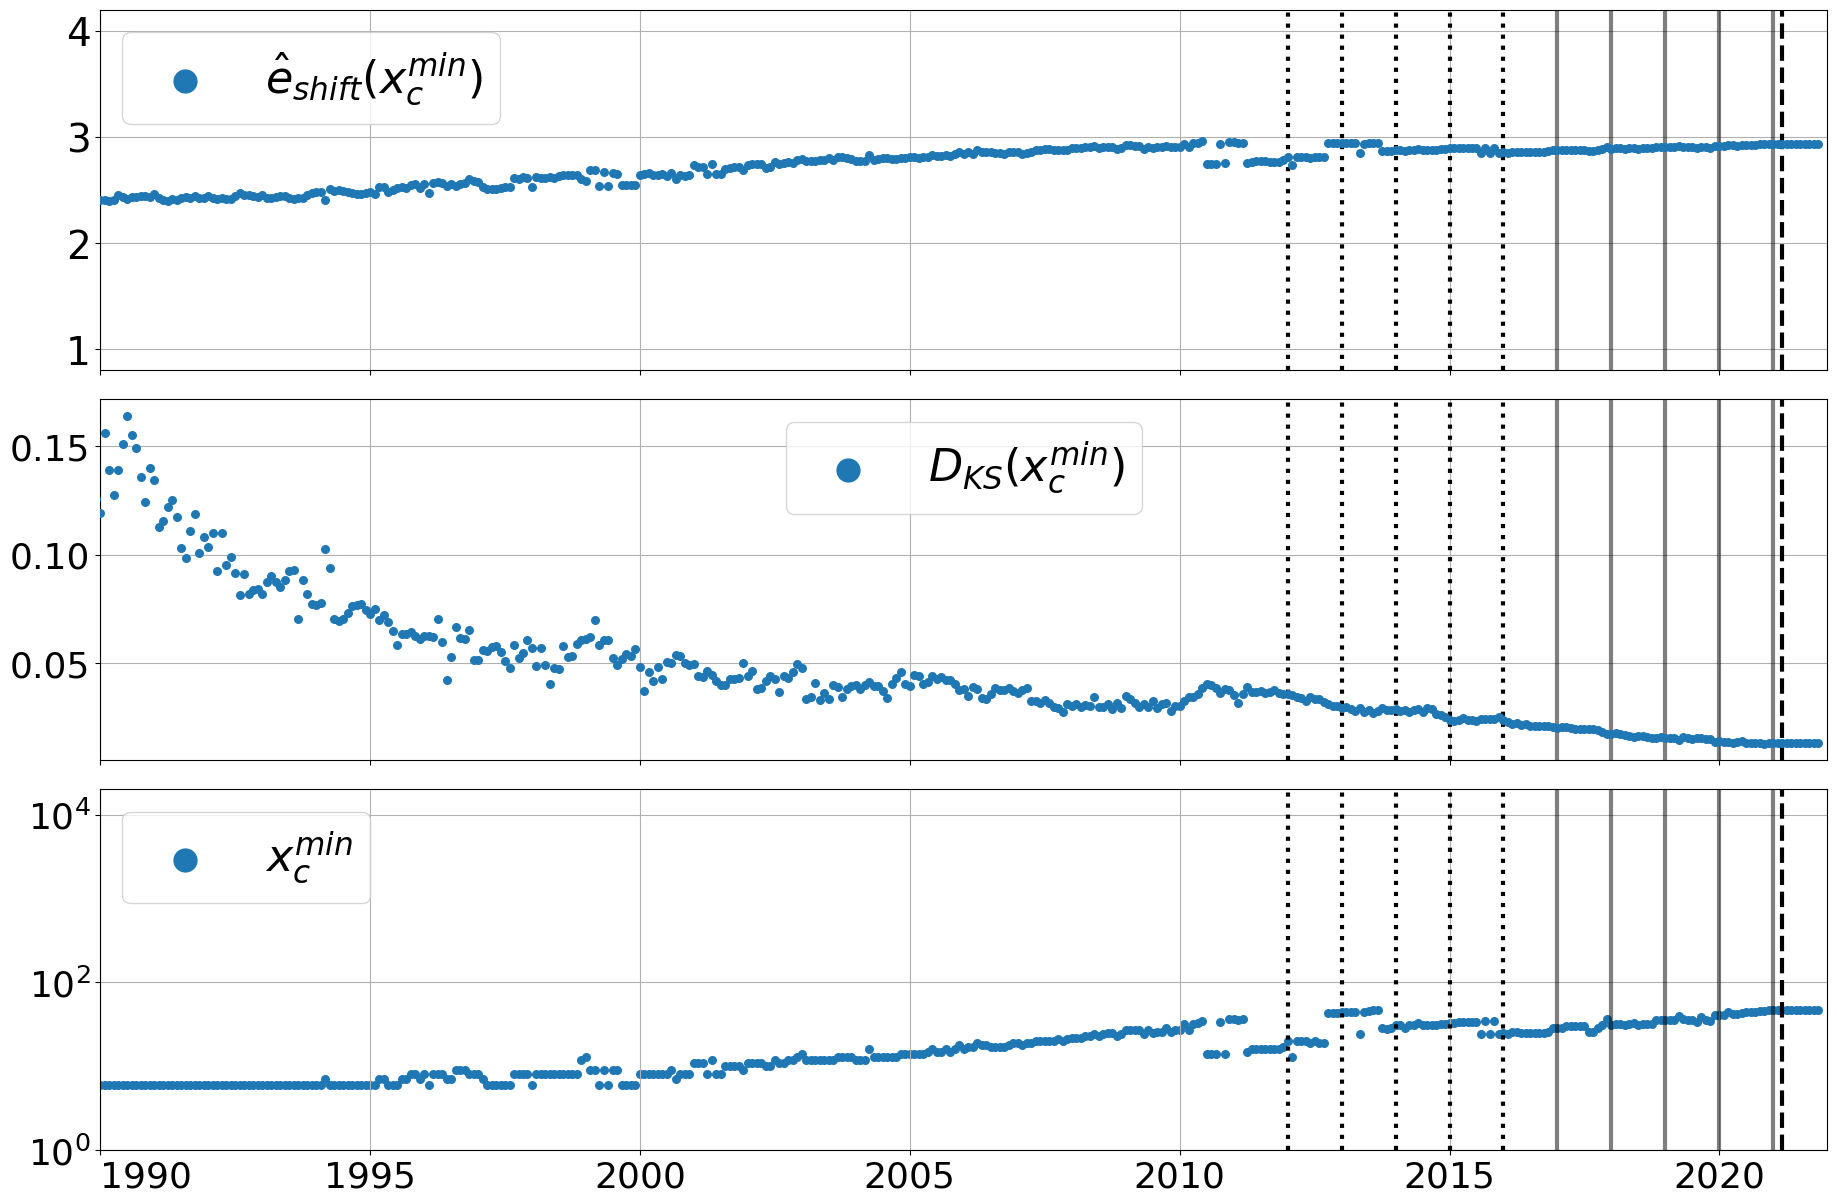

In [23]:
if DisplayStat:
    print("weightedKS",WKS,"XCmin>=",XCmin)
    def verticalline(fig,axs):
        #plt.axvline(x=2017,color='k',label="2017/18/19/20/21",alpha=0.5)
        alpha=0.5
        lw=3
        for year in [2017,2018,2019,2020,2021]:
            axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
        axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2012,2013,2014,2015,2016]:
            axs.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)
        
        xticklabels=axs.get_xticklabels()
        for i, label in enumerate(xticklabels):
            if i == 0:  
                label.set_horizontalalignment('left')
            elif i == len(xticklabels) - 1:  
                label.set_horizontalalignment('right')
            else:  
                label.set_horizontalalignment('center')
    nfig=3

    fontsize=28

    #x=np.arange(107,2030+1/100,1/12)


    fig, axs = plt.subplots(nfig,figsize=(18,4*nfig),sharex=True)   
    plt.tight_layout()
    for i in range(nfig):
        axs[i].set_xlim(1990,2022)
        axs[i].grid()




    axs[0].scatter(xdate,e_x_min,s=30,zorder=10,label=r'$\hat{e}_{shift}(x_c^{min})$')
    axs[0].legend(loc='best',fontsize=fontsize+4,ncol=1,markerscale=3)
    #axs[0].set_yscale("log") 
    axs[0].set_ylim(0.8,4.2)
    axs[0].tick_params(axis='both',which='major',labelsize=fontsize)
    verticalline(fig,axs[0])

    axs[1].scatter(xdate,D_max,s=30,zorder=10,label=r'$D_{KS}(x_c^{min})$')
    axs[1].legend(loc='best',fontsize=fontsize+4,ncol=2,markerscale=3)
    #axs[1].set_yscale("log") 
    axs[1].tick_params(axis='both',which='major',labelsize=fontsize-2)
    verticalline(fig,axs[1])

    axs[2].scatter(xdate,x_min,s=30,label=r'$x_c^{min}$')
    axs[2].set_ylim(1,2e4) # attention un point à 0.5 à la date de dump exclu pour la lisibilité
    axs[2].set_yscale("log") 
    axs[2].tick_params(axis='both',which='major',labelsize=fontsize-2)
    axs[2].legend(loc='best',fontsize=fontsize+4,ncol=2,markerscale=3)
    verticalline(fig,axs[2])
    plt.show()

## f)  Distribution tail analysis

weightedKS weightedKS XCmin>= 6
________________________________________________________________________________
O>O
................................................................................


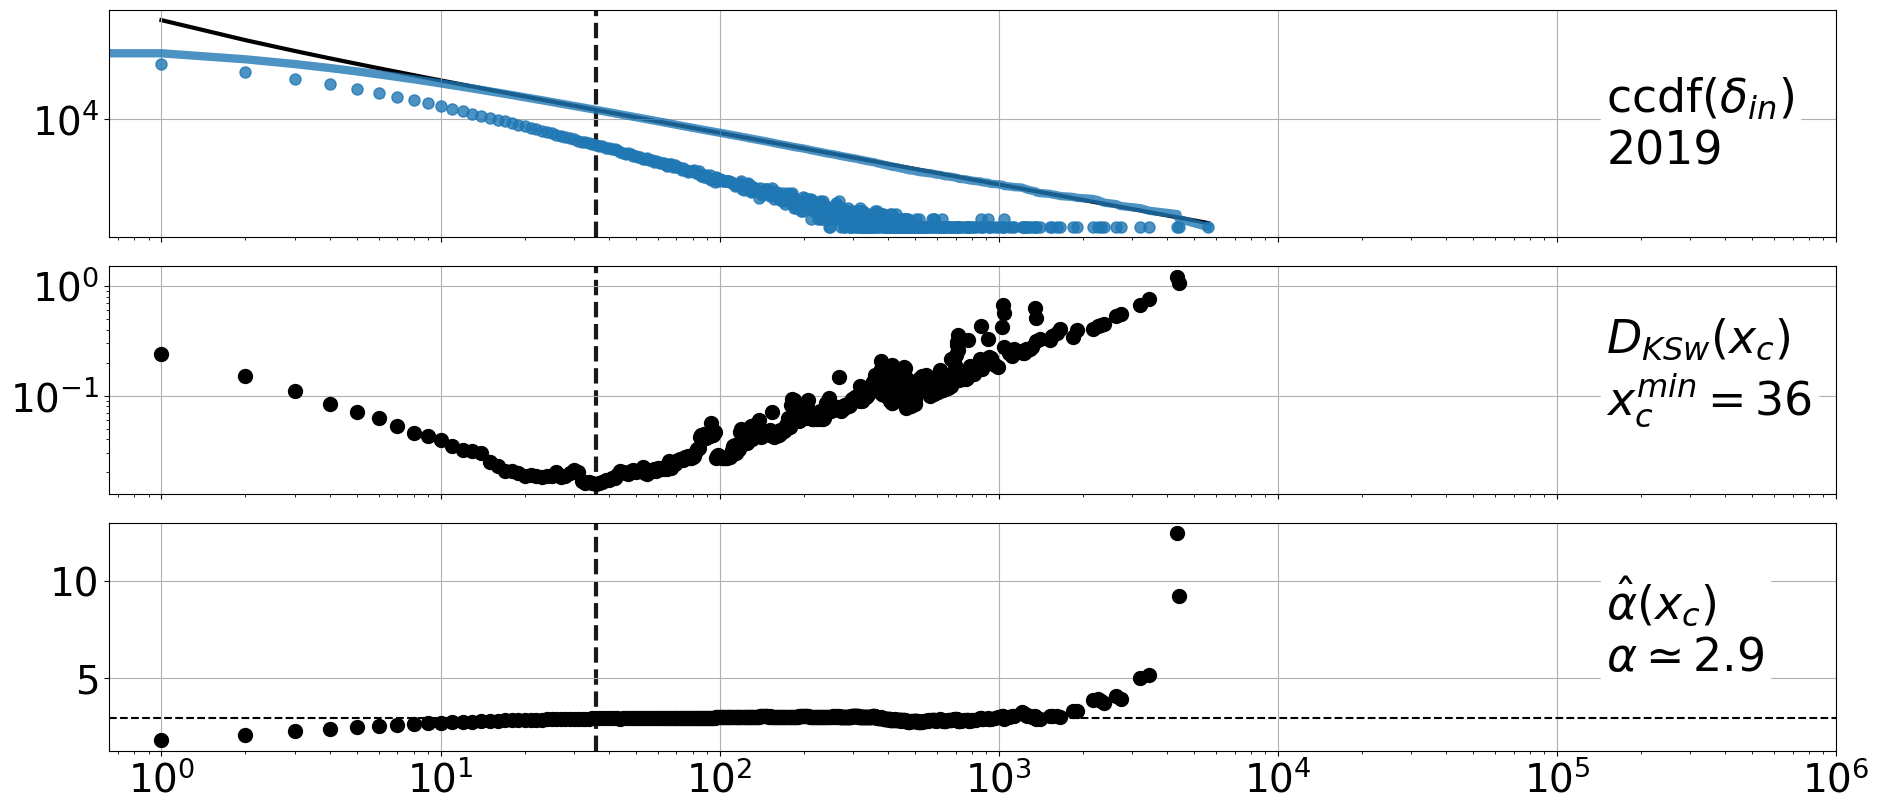

In [24]:
if DisplayStat:
    for filename,case,sentence in [
        (exportpath+"degreeInOutHisto_TT_O-O_BA_Month_1980_2025_"+version+".pkl","O>O","O>O"),
        ]:
        print("weightedKS",WKS,"XCmin>=",XCmin)
        dout,din=pickle.load(open(filename,"rb"))
        print("_"*80)
        print(sentence)
        print("."*80)
        for year in [2019]:
            x=din[case][year*12]["x"]
            y=din[case][year*12]["y"]
            ccdf=din[case][year*12]["ccdf"]

            Plot_Figure_Degree(x,y,ccdf,year=year,filename="NONE",height=4,WKS=WKS,XCmin=XCmin)



## g) `TSL`representation

We set SelfLoop to True 

In [25]:
n=int(1e7)
m=2
SelfLoop=True # because all TSL can not exist
nodes,edges,Nnodes,Nedges,SelfLoop=BarabasiAlbertGraph(n,m,SelfLoop=SelfLoop,Verbose=True,seed=42)
d=SetParamsBA_d(Nnodes)
nodesad=SetParamsBA_nodesad(Nnodes)


Elapse 12.584155321121216


In [26]:
print(d)
print(nodes)
print(edges)
print(Nnodes,Nedges)
statsoutput={}
for depth in [1,2]:
    statsoutput[depth]=DisplayTypeStats(nodes,edges,d,depth=depth)

{'O': 10000000, 'OindexMin': 0, 'OindexMax': 9999999}
[       0        3        6 ... 29999994 29999997 30000000]
[      1       2       0 ... 9760937 8500957 9999999]
10000000 30000000
GetNodesTypesArray [Elapse time : 1.0 (s)]
___ 000   :               0 (0.0%)
___ 001   :               0 (0.0%)
___ 010   :               0 (0.0%)
___ 011   :       5,002,430 (50.02%)
___ 101   :               0 (0.0%)
___ 111   :       4,997,570 (49.98%)
____________________________________
___ Total :      10,000,000 (100.0%)

GetEdgesTypesArray [Elapse time : 1.0 (s)]
___ 010>101 :               0 (0.0%)
___ 010>111 :               0 (0.0%)
___ 011>101 :               0 (0.0%)
___ 011>111 :      10,004,860 (50.02%)
___ 111>101 :               0 (0.0%)
___ 111>111 :       9,995,140 (49.98%)
____________________________________
___ Total :      20,000,000 (100.0%)

GetEdgesTypesArray Self Loop [Elapse time : 1.0 (s)]
011=011       5,002,430 (50.02%)
111=111       4,997,570 (49.98%)
___________________

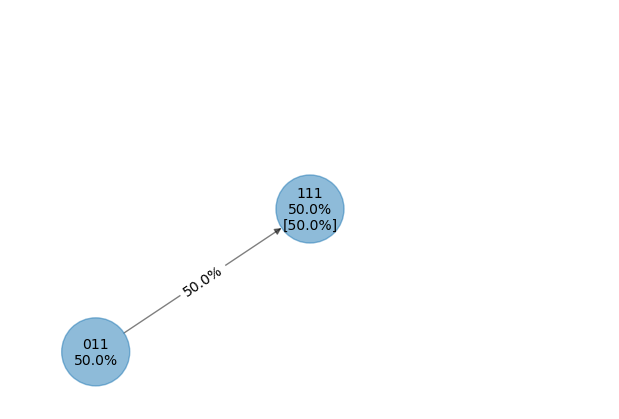

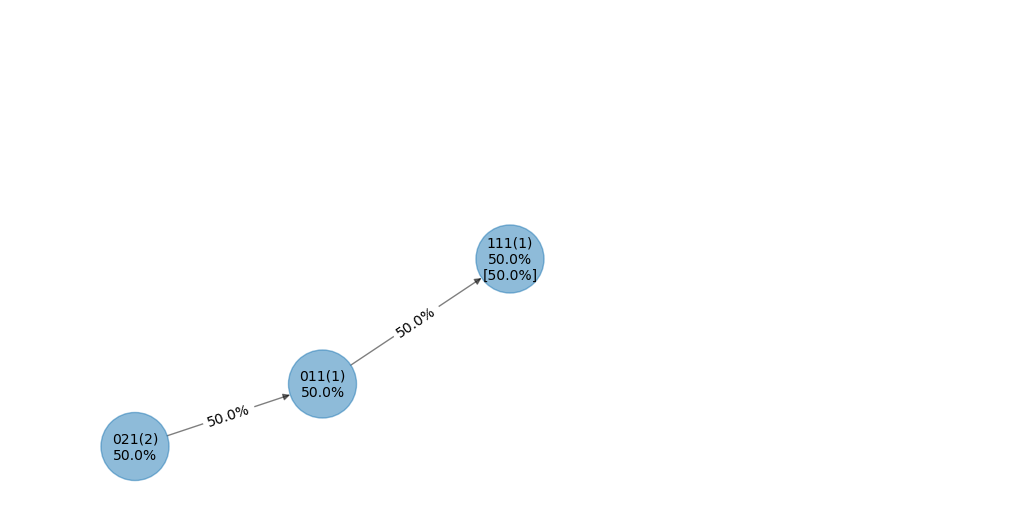

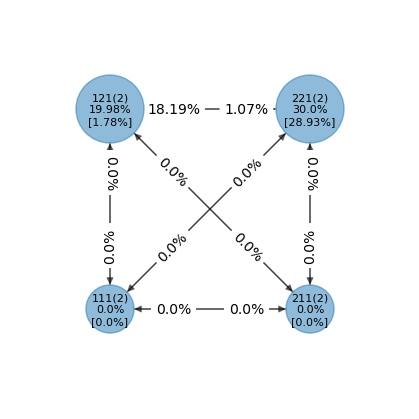

In [27]:
DisplayTSLGraph_Delta_1(statsoutput)
DisplayTSLGraph_Delta_1_2(statsoutput)